# This is fraud Detection Application
### This model uses Random Forest Algorithim for Fraud Classification
#### This model utilizes dataset from kaggle

#### This Model is comprised of the following steps:

1. Library Imports
2. Data Loading
3. Data Preprocessing
4. Model Training
5. Class Imbalance Handling
6. Model Export

### Library Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib

### Data Load

In [7]:
dataset = load_dataset("Nooha/cc_fraud_detection_dataset")
df = pd.DataFrame(dataset['train'])

In [8]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
           ssn            cc_num    first   last gender      city state  \
0  367-85-9826  4361337605230458  Kristie  Davis      F  Chandler    OK   
1  367-85-9826  4361337605230458  Kristie  Davis      F  Chandler    OK   
2  367-85-9826  4361337605230458  Kristie  Davis      F  Chandler    OK   
3  367-85-9826  4361337605230458  Kristie  Davis      F  Chandler    OK   
4  367-85-9826  4361337605230458  Kristie  Davis      F  Chandler    OK   

     zip  city_pop                     job         dob      acct_num  \
0  74834      7590  Chief Strategy Officer  1987-06-12  349734538563   
1  74834      7590  Chief Strategy Officer  1987-06-12  349734538563   
2  74834      7590  Chief Strategy Officer  1987-06-12  349734538563   
3  74834      7590  Chief Strategy Officer  1987-06-12  349734538563   
4  74834      7590  Chief Strategy Officer  1987-06-12  349734538563   

                          trans_num  trans_date trans_time   unix_time  \
0  c036244703adb9d5392f40

In [9]:
# Display dataset information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646694 entries, 0 to 2646693
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   city        object 
 6   state       object 
 7   zip         int64  
 8   city_pop    int64  
 9   job         object 
 10  dob         object 
 11  acct_num    int64  
 12  trans_num   object 
 13  trans_date  object 
 14  trans_time  object 
 15  unix_time   int64  
 16  category    object 
 17  amt         float64
 18  is_fraud    int64  
 19  merchant    object 
dtypes: float64(1), int64(6), object(13)
memory usage: 403.9+ MB
None


### Data Preprocessing

In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
ssn           0
cc_num        0
first         0
last          0
gender        0
city          0
state         0
zip           0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
trans_date    0
trans_time    0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
dtype: int64


In [11]:
# Drop non-numeric columns (if any)
numeric_df = df.select_dtypes(include=['number'])

# Ensure the target column 'is_fraud' is included
if 'is_fraud' not in numeric_df.columns:
    numeric_df['is_fraud'] = df['is_fraud']

# Separate features and target
X = numeric_df.drop(columns=['is_fraud'])
y = numeric_df['is_fraud']

In [12]:
# Display the shape of the dataset
print("\nShape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Shape of Features (X): (2646694, 6)
Shape of Target (y): (2646694,)


### Feature Scaling

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

print("Scaled Features:")
print(X_scaled[:5])

Scaled Features:
[[-0.31022966  0.75530067 -0.4848491  -0.49208358 -1.12618154  1.60692892]
 [-0.31022966  0.75530067 -0.4848491  -0.49208358 -1.12037479 -0.29432497]
 [-0.31022966  0.75530067 -0.4848491  -0.49208358 -1.12032113 -0.2854319 ]
 [-0.31022966  0.75530067 -0.4848491  -0.49208358 -1.12039735 -0.31721862]
 [-0.31022966  0.75530067 -0.4848491  -0.49208358 -0.73457409  0.03429794]]


### Data Splitting

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Display the shape of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2117355, 6)
Shape of X_test: (529339, 6)
Shape of y_train: (2117355,)
Shape of y_test: (529339,)


### Model Training

In [16]:
# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Train the model
model.fit(X_train, y_train)

# Display training completion message
print("Model training completed!")

Model training completed!


### Model Evaluation

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9615


In [19]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))


Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98    527441
       Fraud       0.07      0.82      0.13      1898

    accuracy                           0.96    529339
   macro avg       0.54      0.89      0.56    529339
weighted avg       1.00      0.96      0.98    529339



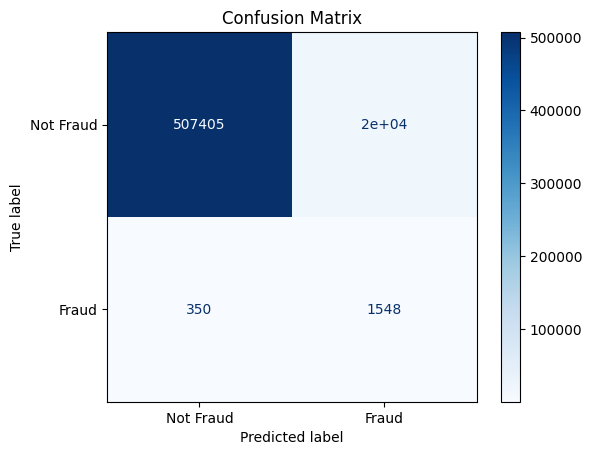

In [20]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Model Export


In [21]:
# Save the model
joblib.dump(model, 'cc_fraud_model.pkl')

# Save the scaler
joblib.dump(scaler, 'cc_fraud_scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
